<h1>The Report of Covid-19 Spread On Each Country Monthly</h1>

I use the dataset from [here](https://github.com/CSSEGISandData/COVID-19).

The file that we will be using are time_series_covid19_confirmed_global.csv, which consists of the amount of confirmed case every day.

In [1]:
#import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#call the dataset
dataset = pd.read_csv("E:/COVID_19/time_series_covid19_confirmed_global.csv")

dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,996,1026,1092,1176,1279,1351,1463,1531,1703,1828
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,562,584,609,634,663,678,712,726,736,750
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,713,717,717,723,723,731,738,738,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,25,25,25,25,26,27,27


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Columns: 102 entries, Province/State to 4/28/20
dtypes: float64(2), int64(98), object(2)
memory usage: 210.5+ KB


From the info, there are some things that need to fixed, that is:
- List the time line into monthly, not daily, so its easier to understand.
- We need to do something about the province/state column.
- Set the column names, so it all consists of lowercases

In [3]:
#create a new dataset for the time
time_list_end = ["1/31/20", "2/29/20", "3/31/20", "4/28/20"]
time_list_month = ["january", "february", "march", "april"]

for loop in range(len(time_list_end)):
    dataset[time_list_month[loop]] = dataset[time_list_end[loop]]

#lets also set the column names
dataset.columns = map(str.lower, dataset.columns)
dataset.head()

,province/state,country/region,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,january,february,march,april
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,0,1,174,1828
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,663,678,712,726,736,750,0,0,243,750
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,0,1,716,3649
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,731,738,738,743,743,0,0,376,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,26,27,27,0,0,7,27


In [4]:
#lets look at the values in each month
dataset["january"].unique()

array([   0,    4,    2,    3,    1,  237,  139,  211,  120,   29,  436,
         87,   52,   82,   59,  352,   12, 5806,  332,   20,  168,  240,
         14,   48,    7,   21,    8,  184,  135,   39,  177,   32,   17,
         83,  538,    5,   15,   11,   13,   10,   19], dtype=int64)

In [5]:
dataset["february"].unique()

array([    1,     0,     4,     9,     3,     7,     2,    41,     8,
          11,   990,   411,   576,   296,    91,  1349,   252,   146,
         168,   318,   480,  1272,    95, 66337,  1018,    75,   631,
         935,    93,   121,    10,    73,    18,   245,   756,   337,
         133,   538,   136,    76,   174,  1205,     6,   705,   100,
          79,   593,    13,  1128,   241,  3150,    45,    25,    15,
         102,    12,    39,    42,    21,    23,    68,    16],
      dtype=int64)

In [6]:
dataset["march"].unique()

array([   174,    243,    716,    376,      7,   1054,    532,     80,
         2032,     17,    743,    337,     69,    917,    364,  10180,
          298,     14,    567,     51,     34,    152,  12775,      9,
            4,    107,    420,   5717,    129,    399,    261,      6,
          109,    193,    690,   1013,     13,    103,     70,    147,
         1966,     21,   4162,    184,      3,   2738,    990,    580,
          579,    343,    138,   1494,    254,    146,    168,    321,
          484,   1276,    714,  67801,   1018,    646,    937,     98,
          139,     41,     75,     18,    253,    774,    509,    136,
          550,      1,     76,    182,   1257,    906,     19,    347,
          179,    867,    712,    186,    262,   3308,    169,     10,
         2860,     30,   1109,   2240,    710,     32,     12,     15,
          745,     26,      5,   1418,     43,     36,    114,     94,
           16,    247,    128,  52128,    110,  71808,    161,   1314,
      

In [7]:
dataset["april"].unique()

array([   1828,     750,    3649,     743,      27,      24,    4127,
          1867,     106,    3016,      28,    1034,     438,     218,
          1354,     550,   15357,    1717,      80,    2811,    6462,
         12208,   47334,      64,       7,    1014,    1585,   73235,
           138,    1399,     638,     114,     122,    1705,    4850,
          2053,      13,     273,     118,     258,     915,   16500,
         25761,     366,      50,      52,   14365,     991,     593,
           579,     355,     139,    1588,     254,     147,     168,
           328,     939,    1276,    1037,   68128,    1019,     199,
           653,     937,     110,     146,      45,      75,      18,
           306,     787,     645,     197,     561,     190,       1,
            76,     185,    1268,    5949,     207,     471,     705,
          1183,    2047,     712,    1437,     837,    7504,     187,
            11,    8851,    1072,    6416,   24258,    5042,     345,
           315,     

In [8]:
#lets take a look about the province/state column
dataset["province/state"].value_counts(dropna=False)

NaN                         182
Turks and Caicos Islands      1
New Caledonia                 1
Hubei                         1
Inner Mongolia                1
                           ... 
Bermuda                       1
Tasmania                      1
Chongqing                     1
Montserrat                    1
New South Wales               1
Name: province/state, Length: 83, dtype: int64

We will combine the rows that has the same value on Country/Region column, because we want to do the analysis on that column only. We also will change the NaN values with "-".

In [9]:
multiplicative_rows = dataset["country/region"].duplicated()

dataset["country/region"][multiplicative_rows].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'United Kingdom'], dtype=object)

In [10]:
#sum all the cases per month
multiplicated_countries = dataset["country/region"][multiplicative_rows].unique()

for loop in range(len(multiplicated_countries)):
    for loop1 in range(len(time_list_month)):
       dataset[time_list_month[loop1]][dataset["country/region"] == multiplicated_countries[loop]] = dataset[time_list_month[loop1]][dataset["country/region"] == multiplicated_countries[loop]].sum(axis = 0)
    dataset.drop(dataset[dataset["country/region"] == multiplicated_countries[loop]].index[1:], inplace = True)
    
dataset[dataset["country/region"] == "China"]

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,province/state,country/region,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,january,february,march,april
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,9802,79356,82279,83940


In [11]:
#lets change the NaN values
dataset["province/state"].fillna("-", inplace = True)
dataset.head()

,province/state,country/region,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,january,february,march,april
0,-,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,0,1,174,1828
1,-,Albania,41.1533,20.1683,0,0,0,0,0,0,...,663,678,712,726,736,750,0,0,243,750
2,-,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,0,1,716,3649
3,-,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,731,738,738,743,743,0,0,376,743
4,-,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,26,27,27,0,0,7,27


<h2>Prepare the Plot</h2>

For these dataset, we will create a pie chart, rank the most affected country since 28 April 2020. To do it, we will:
- Make the percentage of number of case from total case for each country.
- Make the top 10 country, while the remaining country will be summed up, and create a new column named "Other Countries".

In [12]:
#before make the percentage, we should make the total case of each month
total_january =  dataset["january"].sum(axis=0)

total_january

9927

In [13]:
total_february =  dataset["february"].sum(axis=0)

total_february

86011

In [14]:
total_march =  dataset["march"].sum(axis=0)

total_march

857608

In [15]:
total_april =  dataset["april"].sum(axis=0)

total_april

3116398

In [16]:
#lets continue observing February
dataset["january_percent"] = dataset["january"] / total_january * 100
dataset[["country/region", "january_percent"]].sort_values(ascending = False, by = "january_percent")[:10]

,country/region,january_percent
49,China,98.740808
209,Thailand,0.191397
139,Japan,0.151103
196,Singapore,0.130956
143,"Korea, South",0.110809
207,Taiwan*,0.100735
8,Australia,0.090662
153,Malaysia,0.080588
225,US,0.070515
107,France,0.050368


In [17]:
#because the virus spread was mostly on China only, so we will sum the other values and add them into "Other Countries"
january_percentage = pd.DataFrame({"country/region" : ["China", "Other Countries"],
                                        "percentage" : [dataset[dataset["country/region"] == "China"]["january_percent"].unique().tolist()[0],
                                                       dataset["january_percent"].sort_values(ascending = False).iloc[1:].sum(axis = 0)]})

january_percentage

,country/region,percentage
0,China,98.740808
1,Other Countries,1.259192


In [18]:
#lets continue observing February
dataset["february_percent"] = dataset["february"] / total_february * 100
dataset[["country/region", "february_percent"]].sort_values(ascending = False, by = "february_percent")[:10]

,country/region,february_percent
49,China,92.262618
143,"Korea, South",3.662322
137,Italy,1.311460
88,Diamond Princess,0.819663
133,Iran,0.689447
139,Japan,0.280197
196,Singapore,0.118589
107,France,0.116264
120,Germany,0.091849
225,US,0.079060


In [19]:
#because the virus spread still on China, we will sum the other values and add them into "Other Countries"
february_percentage = pd.DataFrame({"country/region" : ["China", "Other Countries"],
                                        "percentage" : [dataset[dataset["country/region"] == "China"]["february_percent"].unique().tolist()[0],
                                                       dataset["february_percent"].sort_values(ascending = False).iloc[1:].sum(axis = 0)]})

february_percentage

,country/region,percentage
0,China,92.262618
1,Other Countries,7.737382


In [20]:
#lets check the spread on March
dataset["march_percent"] = dataset["march"] / total_march * 100
dataset[["country/region", "march_percent"]].sort_values(ascending = False, by = "march_percent")[:10]

,country/region,march_percent
225,US,21.941493
137,Italy,12.335706
201,Spain,11.184947
49,China,9.594010
120,Germany,8.373056
107,France,6.159807
133,Iran,5.201094
217,United Kingdom,2.971171
206,Switzerland,1.936199
213,Turkey,1.577760


In [21]:
#the virus started to spread other countries,
#so we will display US, Italy, Spain, China, Germany, and finally sum the other values and add them into "Other Countries"
march_percentage = pd.DataFrame({"country/region" : ["US", "Italy", "Spain", "China", "Germany", "Other Countries"],
                                        "percentage" : [dataset[dataset["country/region"] == "US"]["march_percent"].unique().tolist()[0],
                                                        dataset[dataset["country/region"] == "Italy"]["march_percent"].unique().tolist()[0],
                                                        dataset[dataset["country/region"] == "Spain"]["march_percent"].unique().tolist()[0],
                                                        dataset[dataset["country/region"] == "China"]["march_percent"].unique().tolist()[0],
                                                        dataset[dataset["country/region"] == "Germany"]["march_percent"].unique().tolist()[0],
                                                        dataset["march_percent"].sort_values(ascending = False).iloc[5:].sum(axis = 0)]})

march_percentage

,country/region,percentage
0,US,21.941493
1,Italy,12.335706
2,Spain,11.184947
3,China,9.594010
4,Germany,8.373056
5,Other Countries,36.570788


In [22]:
dataset["april_percent"] = dataset["april"] / total_april * 100
dataset[["country/region", "april_percent"]].sort_values(ascending = False, by = "april_percent")[:10]

,country/region,april_percent
225,US,32.492063
201,Spain,7.448599
137,Italy,6.465958
107,France,5.424628
217,United Kingdom,5.209540
120,Germany,5.131309
213,Turkey,3.679023
187,Russia,3.002120
133,Iran,2.970866
49,China,2.693494


In [23]:
#we will display US, Italy, Spain, China, Germany, and finally sum the other values and add them into "Other Countries"
april_percentage = pd.DataFrame({"country/region" : ["US", "Spain", "Italy", "France", "Germany", "Other Countries"],
                                        "percentage" : [dataset[dataset["country/region"] == "US"]["april_percent"].unique().tolist()[0],
                                                        dataset[dataset["country/region"] == "Spain"]["april_percent"].unique().tolist()[0],
                                                        dataset[dataset["country/region"] == "Italy"]["april_percent"].unique().tolist()[0],
                                                        dataset[dataset["country/region"] == "France"]["april_percent"].unique().tolist()[0],
                                                        dataset[dataset["country/region"] == "Germany"]["april_percent"].unique().tolist()[0],
                                                        dataset["april_percent"].sort_values(ascending = False).iloc[5:].sum(axis = 0)]})

april_percentage

,country/region,percentage
0,US,32.492063
1,Spain,7.448599
2,Italy,6.465958
3,France,5.424628
4,Germany,5.131309
5,Other Countries,42.959211


<h2>Setting the Pie Plot</h2>

Now, we will create pie plots from the percentages we made before.

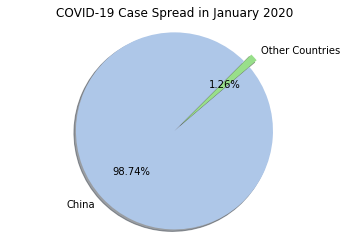

In [24]:
#now, lets create the pie plot for January
color_pie = [(174/255, 199/255, 232/255),
            (152/255, 223/255, 138/255)]
explode_pie = (0, .1)

fig = plt.figure()
plt.pie(january_percentage["percentage"],
        labels = january_percentage["country/region"], 
        autopct = "%.2f%%", 
        colors = color_pie,
        shadow = True,
        explode = explode_pie,
        startangle = 45)
plt.axis("equal")
plt.title("COVID-19 Case Spread in January 2020")
plt.show()
fig.savefig("COVID-19_January.png", bbox_inches = "tight")

If we're looking at the pie plot, the Coronavirus spreads mostly on China, which dominates the plot with 98.74%.

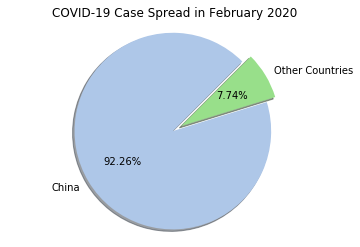

In [25]:
#now, lets create the pie plot for February
color_pie = [(174/255, 199/255, 232/255),
            (152/255, 223/255, 138/255)]
explode_pie = (0, .1)

fig = plt.figure()
plt.pie(february_percentage["percentage"],
        labels = february_percentage["country/region"], 
        autopct = "%.2f%%", 
        colors = color_pie,
        shadow = True,
        explode = explode_pie,
        startangle = 45)
plt.axis("equal")
plt.title("COVID-19 Case Spread in February 2020")
plt.show()
fig.savefig("COVID-19_February.png", bbox_inches = "tight")

If we're looking at the pie plot, the Coronavirus starts to spread to Other Countries, which escalates from 1.26% into 7.74%. But, the virus still mostly spreads on China.

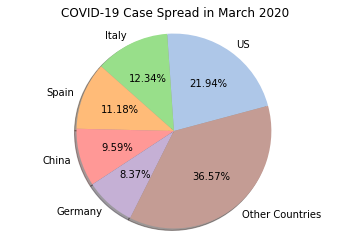

In [26]:
#now, lets create the pie plot for March
color_pie = [(174/255, 199/255, 232/255),
            (152/255, 223/255, 138/255),
            (255/255, 187/255, 120/255),
            (255/255, 152/255, 150/255),
            (197/255, 176/255, 213/255),
            (196/255, 156/255, 148/255)]
fig = plt.figure()
plt.pie(march_percentage["percentage"],
        labels = march_percentage["country/region"], 
        autopct = "%.2f%%", 
        colors = color_pie,
        shadow = True,
        startangle = 15)
plt.axis("equal")
plt.title("COVID-19 Case Spread in March 2020")
plt.show()
fig.savefig("COVID-19_March.png", bbox_inches = "tight")

If we're looking at the plot, we can see that the Coronavirus spread in China stops on spreading massively (like the past 2 months). But, this virus massively spreads on other countries, especially US.

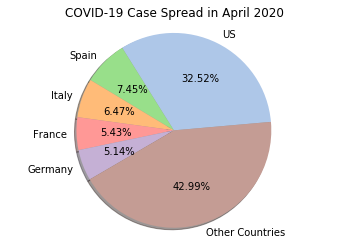

In [27]:
#now, lets create the pie plot for April
color_pie = [(174/255, 199/255, 232/255),
            (152/255, 223/255, 138/255),
            (255/255, 187/255, 120/255),
            (255/255, 152/255, 150/255),
            (197/255, 176/255, 213/255),
            (196/255, 156/255, 148/255)]
fig = plt.figure()
plt.pie(april_percentage["percentage"],
        labels = april_percentage["country/region"], 
        autopct = "%.2f%%", 
        colors = color_pie,
        shadow = True,
        startangle = 5)
plt.axis("equal")
plt.title("COVID-19 Case Spread in April 2020")
plt.show()
fig.savefig("COVID-19_April.png", bbox_inches = "tight")

If we're looking at the pie plot, the spreads on Coronavirus spreads on China getting slower, since the latest news confirmed that Wuhan (the city where the first infection occured), end their lockdown on 8th April (source [here](https://time.com/5808736/china-ends-hubei-coronavirus-lockdown/)). Meanwhile, the spread on other countries just gets worse, which escalates from 21.94% into 32.52% just in US. 

<h2>COVID-19 Spread on Each Country</h2>

After we look at the spread at world scale, we will look at each country, especially at China, US, Spain, Italy, and Germany. To do this, we will:
- Make line plots about the COVID-19 spread on each country
- The x axis represents the date (we make this daily), and the y axis represents the value.

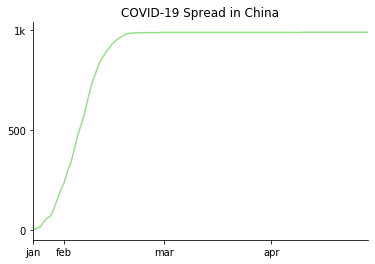

In [33]:
style = {"axes.spines.right" : False, #removing the right and top spines
        "axes.spines.top" : False}

dataset_time_daily = dataset.iloc[:,4:102].copy()
dataset_time_daily = dataset_time_daily.set_index(dataset["country/region"])
dataset_time_daily.index.name = [None]

#view COVID-19 growth in China
with plt.style.context(style):
    fig = plt.figure()
    ax = dataset_time_daily.loc["China"].plot(c = (152/255, 223/255, 138/255), title = "COVID-19 Spread in China")
    ax.set_xticks([0, 9, 38, 69])
    ax.set_xticklabels(["jan", "feb", "mar", "apr"])
    ax.set_yticks([0, 500, 1000])
    ax.set_yticklabels([0, "500", "1k"])
    fig.savefig("COVID-19_China.png", bbox_inches = "tight")

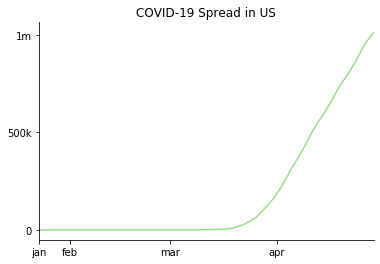

In [34]:
#lets also view COVID-19 growth in US
with plt.style.context(style):
    fig = plt.figure()
    ax = dataset_time_daily.loc["US"].plot(c = (152/255, 223/255, 138/255), title = "COVID-19 Spread in US")
    ax.set_xticks([0, 9, 38, 69])
    ax.set_xticklabels(["jan", "feb", "mar", "apr"])
    ax.set_yticks([0, 500000, 1000000])
    ax.set_yticklabels([0, "500k", "1m"])
    fig.savefig("COVID-19_US.png", bbox_inches = "tight")

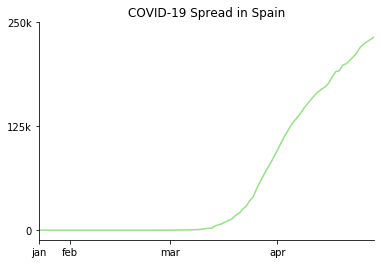

In [35]:
#view COVID-19 growth in Spain
with plt.style.context(style):
    fig = plt.figure()
    ax = dataset_time_daily.loc["Spain"].plot(c = (152/255, 223/255, 138/255), title = "COVID-19 Spread in Spain")
    ax.set_xticks([0, 9, 38, 69])
    ax.set_xticklabels(["jan", "feb", "mar", "apr"])
    ax.set_yticks([0, 125000, 250000])
    ax.set_yticklabels([0, "125k", "250k"])
    fig.savefig("COVID-19_Spain.png", bbox_inches = "tight")

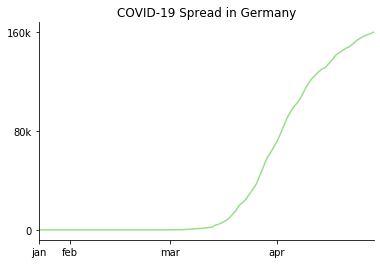

In [36]:
#view COVID-19 growth in Germany
with plt.style.context(style):
    fig = plt.figure()
    ax = dataset_time_daily.loc["Germany"].plot(c = (152/255, 223/255, 138/255), title = "COVID-19 Spread in Germany")
    ax.set_xticks([0, 9, 38, 69])
    ax.set_xticklabels(["jan", "feb", "mar", "apr"])
    ax.set_yticks([0, 80000, 160000])
    ax.set_yticklabels([0, "80k", "160k"])
    fig.savefig("COVID-19_Germany.png", bbox_inches = "tight")

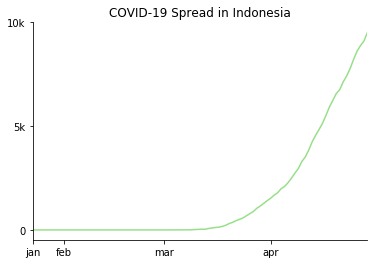

In [37]:
#view COVID-19 growth in Indonesia
with plt.style.context(style):
    fig = plt.figure()
    ax = dataset_time_daily.loc["Indonesia"].plot(c = (152/255, 223/255, 138/255), title = "COVID-19 Spread in Indonesia")
    ax.set_xticks([0, 9, 38, 69])
    ax.set_xticklabels(["jan", "feb", "mar", "apr"])
    ax.set_yticks([0, 5000, 10000])
    ax.set_yticklabels([0, "5k", "10k"])
    fig.savefig("COVID-19_Indonesia.png", bbox_inches = "tight")